In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

# Paso 0: Cargo datos

### NOTAR EL index_col. Esto es importante para cuando se mergean datos

In [2]:
# Variables exógenas, predictores, covariables, features, X
# 
aord = pd.read_csv('data/ALLOrdinary.csv', index_col='Date')
nikkei = pd.read_csv('data/Nikkei225.csv', index_col='Date')
hsi = pd.read_csv('data/HSI.csv', index_col='Date')
daxi = pd.read_csv('data/DAXI.csv', index_col='Date')
cac40 = pd.read_csv('data/CAC40.csv', index_col='Date')
sp500 = pd.read_csv('data/SP500.csv', index_col='Date')
dji = pd.read_csv('data/DJI.csv', index_col='Date')
nasdaq = pd.read_csv('data/nasdaq_composite.csv', index_col='Date')

# Variable endógena, Y
spy = pd.read_csv('data/SPY.csv', index_col='Date')

In [3]:
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,2653.909912,2661.500000,2597.810059,2609.629883,2609.629883,2076690000
2008-01-03,2611.959961,2624.270020,2592.179932,2602.679932,2602.679932,1970200000
2008-01-04,2571.080078,2571.080078,2502.679932,2504.649902,2504.649902,2516310000
2008-01-07,2514.149902,2521.620117,2471.229980,2499.459961,2499.459961,2600100000
2008-01-08,2506.969971,2527.419922,2440.510010,2440.510010,2440.510010,2566480000


In [4]:
nikkei.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-04,15155.730469,15156.660156,14542.580078,14691.410156,14691.410156,98700.0
2008-01-07,14549.379883,14667.849609,14438.610352,14500.549805,14500.549805,139800.0
2008-01-08,14429.299805,14547.799805,14365.860352,14528.669922,14528.669922,146800.0
2008-01-09,14364.709961,14602.650391,14271.570313,14599.160156,14599.160156,155500.0
2008-01-10,14546.320313,14584.730469,14388.110352,14388.110352,14388.110352,130100.0


### Notar que nasdaq y nikkei arrancan en fechas diferentes

# Paso 1: preprocesamiento de los datos

In [5]:
# Mostrar como trabaja el shift con las fechas como indices
# sp500['Open'].shift(1)

In [6]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,146.529999,146.990005,143.880005,144.929993,116.593864,204935600
2008-01-03,144.910004,145.490005,144.070007,144.860001,116.537567,125133300
2008-01-04,143.339996,143.440002,140.910004,141.309998,113.681671,232330900
2008-01-07,141.809998,142.229996,140.100006,141.190002,113.585121,234991000
2008-01-08,142.080002,142.899994,138.440002,138.910004,111.750923,326365700


In [7]:
# Creamos DF con data mergeada
indicepanel=pd.DataFrame(index=spy.index)

# Variable a predecir
indicepanel['spy'] = spy['Open'].shift(-1) - spy['Open']

# Predictores - Notar que los shift aca son positivos +1
indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)
indicepanel['sp500'] = sp500["Open"] - sp500['Open'].shift(1)
indicepanel['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
indicepanel['dji'] = dji['Open'] - dji['Open'].shift(1)

indicepanel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['daxi'] = daxi['Open'] - daxi['Open'].shift(1)

# Australia
indicepanel['aord'] = aord['Close'] - aord['Open']

# Hang Seng Index (Hong Kong)
indicepanel['hsi'] = hsi['Close'] - hsi['Open']

# Japon
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']

indicepanel['Price'] = spy['Open']

In [8]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,NaN,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002


### Verificamos si tenemos NAN

In [9]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

spy           1
spy_lag1      1
sp500         1
nasdaq        1
dji           1
cac40        30
daxi         53
aord        319
hsi         121
nikkei      145
Price         0
dtype: int64

In [10]:
# Analizo algunos
indicepanel[indicepanel.isnull()['daxi']][:3]

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-03-24,1.550003,3.259995,30.619995,47.699951,259.54004,NaN,NaN,136.400390,NaN,7.030274,133.309998
2008-05-01,3.959991,-0.909988,-5.250000,-17.709961,-13.11036,NaN,NaN,-1.500000,NaN,-35.729492,138.380005


In [11]:
indicepanel.loc['2008-03-20':'2008-03-27']

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-03-20,3.259995,-4.089996,-31.299927,-51.620117,-289.08984,-124.049805,-98.180175,NaN,-65.080078,NaN,130.050003
2008-03-24,1.550003,3.259995,30.619995,47.699951,259.54004,NaN,NaN,136.400390,NaN,7.030274,133.309998
2008-03-25,-0.399994,1.550003,18.779907,60.959961,185.37011,181.199707,112.390136,58.199707,622.740234,105.479493,134.860001
2008-03-26,-0.260010,-0.399994,3.380005,-0.539795,-15.54980,-33.660156,64.979981,4.899902,35.259766,57.660156,134.460007
2008-03-27,-1.209992,-0.260010,-12.109985,-13.580078,-109.91016,9.480468,-22.410156,-17.299805,351.650390,-13.839844,134.199997


In [66]:
# Usamos 'fillna()' para llenar los datos que no tenemos
indicepanel = indicepanel.fillna(method='ffill')

In [13]:
# Vemos como quedo corregido al na
indicepanel.loc['2008-03-20':'2008-03-27']

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-03-20,3.259995,-4.089996,-31.299927,-51.620117,-289.08984,-124.049805,-98.180175,-120.899903,-65.080078,118.110352,130.050003
2008-03-24,1.550003,3.259995,30.619995,47.699951,259.54004,-124.049805,-98.180175,136.400390,-65.080078,7.030274,133.309998
2008-03-25,-0.399994,1.550003,18.779907,60.959961,185.37011,181.199707,112.390136,58.199707,622.740234,105.479493,134.860001
2008-03-26,-0.260010,-0.399994,3.380005,-0.539795,-15.54980,-33.660156,64.979981,4.899902,35.259766,57.660156,134.460007
2008-03-27,-1.209992,-0.260010,-12.109985,-13.580078,-109.91016,9.480468,-22.410156,-17.299805,351.650390,-13.839844,134.199997


In [14]:
indicepanel.isnull().sum()

spy         0
spy_lag1    1
sp500       1
nasdaq      1
dji         1
cac40       1
daxi        1
aord        0
hsi         0
nikkei      2
Price       0
dtype: int64

In [15]:
indicepanel[indicepanel.isnull()['nikkei']]

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004


In [16]:
# Las que quedan eran por que empezaban más tarde
indicepanel = indicepanel.dropna()

In [17]:
# Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [18]:
# save this indicepanel for part 4.5
path_save = 'data/indicepanel.csv'
indicepanel.to_csv(path_save)

In [19]:
print(indicepanel.shape)

(2677, 11)


# Paso 2: Split de los datos

In [304]:
# Split en Train y test
N1 = 1500
N2 = 1000
Train = indicepanel.iloc[-N1:-N2, :]
Test = indicepanel.iloc[-N2:, :]
print(Train.shape, Test.shape)

(500, 11) (1000, 11)


In [305]:
Train.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2012-09-05,0.669999,0.050003,-1.600098,9.330078,-56.06055,-59.330079,-71.330078,-27.899903,-185.089843,-76.769531,141.089996
2012-09-06,2.250000,0.669999,-1.199951,15.359863,9.14063,13.649903,42.649903,33.899903,107.371093,-9.769531,141.759995
2012-09-07,0.180007,2.250000,28.380005,45.280030,244.29980,106.770019,199.609863,17.199707,264.230468,50.280274,144.009995
2012-09-10,-0.589996,0.180007,5.800049,-1.879883,19.02930,-5.989990,24.040039,9.200195,-49.240234,16.179687,144.190002
2012-09-11,0.789993,-0.589996,-8.790039,-26.320068,-53.95996,-21.530029,-10.759766,-9.600097,100.511718,-3.950195,143.600006


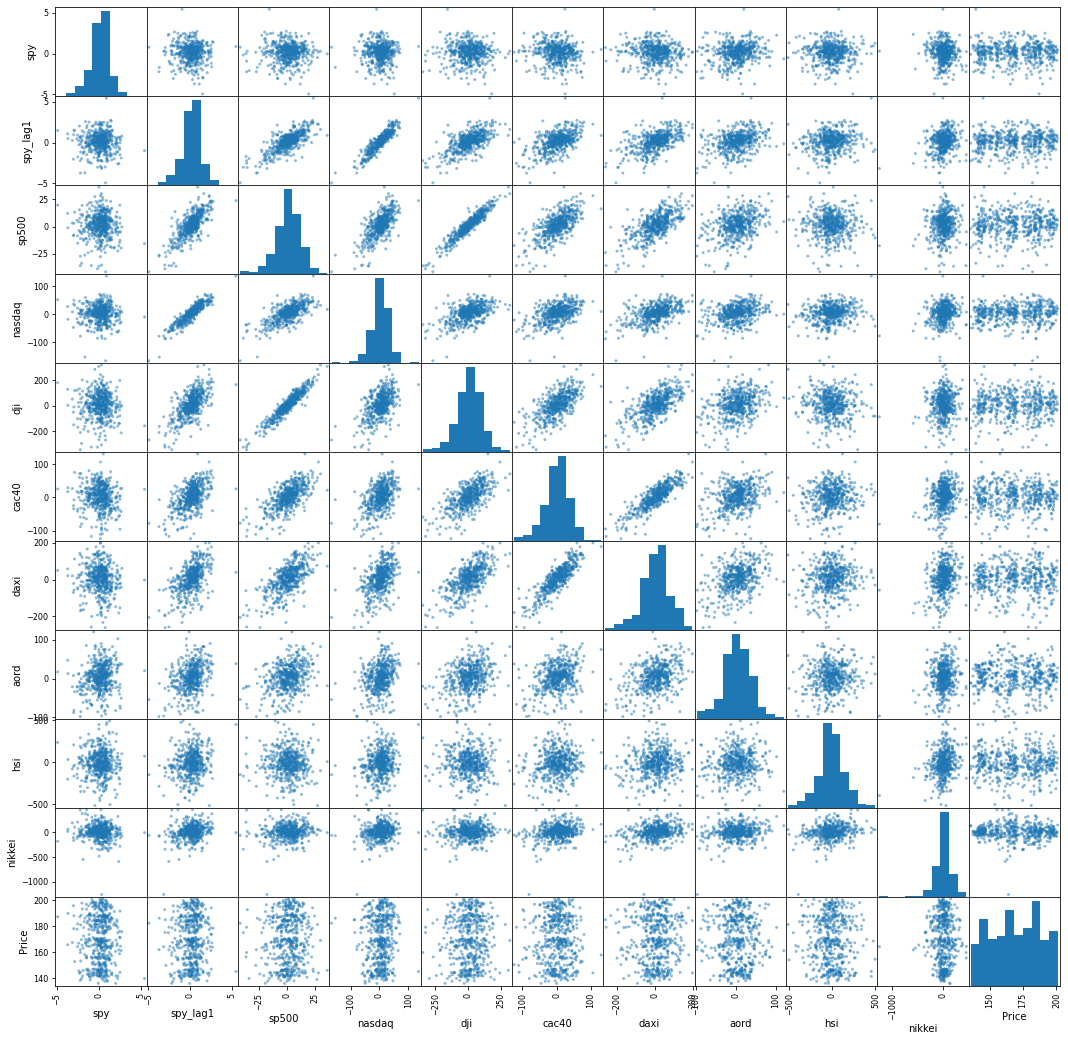

In [306]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(18, 18))

In [307]:
# Correlación con spy
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.035544
sp500      -0.005777
nasdaq     -0.010485
dji        -0.013314
cac40      -0.100965
daxi       -0.080089
aord        0.169599
hsi        -0.007711
nikkei     -0.081637
Name: spy, dtype: float64


# Paso 3 - Entrenamiento y resultados

In [308]:
from sklearn.preprocessing import PolynomialFeatures

In [309]:
trf = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [310]:
################################################
#X=trf.fit_transform(Train.iloc[:,Train.columns!='spy'].values)
X=Train.iloc[:,Train.columns!='spy'].values
y=Train.iloc[:,Train.columns=='spy'].values
X.shape, y.shape

((500, 10), (500, 1))

In [311]:
Test.iloc[:,Test.columns!='spy'].values.shape

(1000, 10)

In [312]:
#Xtest=trf.transform(Test.iloc[:,Test.columns!='spy'].values)
Xtest=Test.iloc[:,Test.columns!='spy'].values
ytest=Test.iloc[:,Test.columns=='spy'].values
Xtest.shape, ytest.shape

((1000, 10), (1000, 1))

In [313]:
######################################
# Modelos de Redes Neuronales
#####################################

In [314]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

Opcion 1:
Entrada=10; Capas=1; Salida=1
Numero de parametros a estimar= 10*1+1

In [315]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.math.divide(residual, total))
    return r2

In [316]:
tf.__version__

'2.7.0'

In [317]:
from tensorflow.keras.optimizers import SGD, Adam

In [318]:
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=100,
#     decay_rate=0.9)
optimizer_adam = keras.optimizers.Adam(learning_rate=0.01)
#optimizer_sgd = keras.optimizers.SGD(1e-2)

In [319]:
def get_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1000, input_shape=(10,), activation="relu"))
    model.add(keras.layers.Dense(1))
    model.summary()
    model.compile(optimizer=optimizer_adam, loss='mse', metrics=R_squared)
    return model

In [320]:
model = get_model()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1000)              11000     
                                                                 
 dense_12 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 12,001
Trainable params: 12,001
Non-trainable params: 0
_________________________________________________________________


In [321]:
def get_coefs(model):
    beta_1 = model.weights[0].numpy()[0][0]
    beta_0 = model.weights[1].numpy()[0]
    return beta_0, beta_1

In [322]:
from sklearn.preprocessing import StandardScaler

In [323]:
trf = StandardScaler()
trf.fit(X)
X_norm = trf.transform(X)
Xtest_norm = trf.transform(Xtest)

In [324]:
history = model.fit(X_norm, y, epochs=500, verbose=0, batch_size=250, validation_data = (Xtest_norm, ytest))

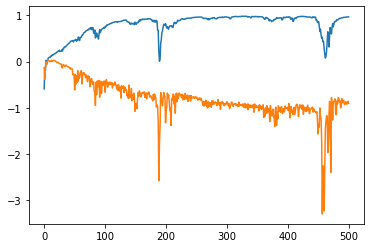

In [325]:
plt.plot(history.history["R_squared"][:])
plt.plot(history.history["val_R_squared"][:])


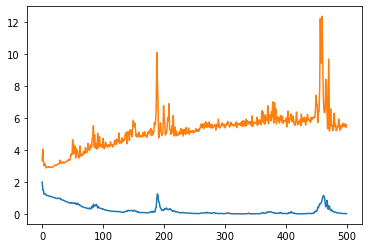

In [326]:
plt.plot(history.history["loss"][:])
plt.plot(history.history["val_loss"][:])

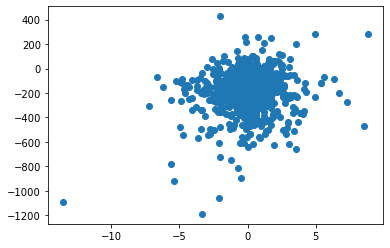

In [327]:
plt.scatter(ytest,model.predict(Xtest) )

In [328]:
model.evaluate(Xtest_norm, ytest)

32/32 [==============================] - 0s 763us/step - loss: 5.5731 - R_squared: -1.6808


[5.573062896728516, -1.6808006763458252]

In [329]:
y_test_pred = model.predict(Xtest_norm)

In [330]:
((y_test_pred - ytest)**2).mean()

5.5730625180689755

In [331]:
R_squared(ytest,y_test_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=-0.8464883694905923>

# Implementar estrategia

Long, short, buy and hold strategies

In [332]:
long = model.predict(Xtest_norm) > 0
short = model.predict(Xtest_norm) < 0

In [333]:
Test.loc[:,"long"] = long
Test.loc[:,"short"] = short

/home/cselmo/.conda/envs/finanzas/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [334]:
Test["long_mar"]=Test.apply(lambda x: x["long"]*x["spy"],axis=1)
Test["short_mar"]=Test.apply(lambda x: -x["short"]*x["spy"],axis=1)

In [335]:
Test[Test["long"]]["spy"].sum()

39.059987999999976

In [336]:
-Test[Test["short"]]["spy"].sum()

-46.49000000000004

In [337]:
Test["spy"].sum()

85.54998800000001

<AxesSubplot:xlabel='Date'>

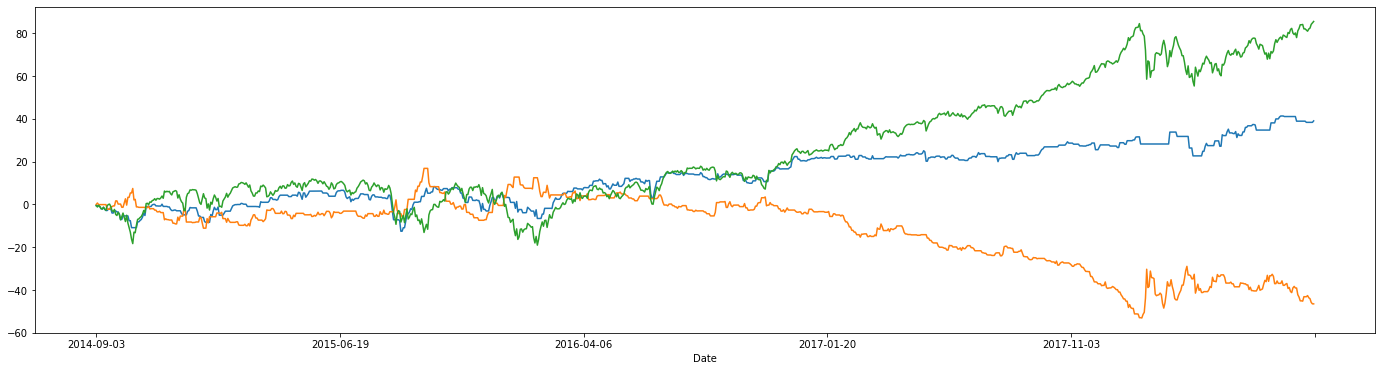

In [338]:
plt.figure(figsize=(24,6))
Test["long_mar"].cumsum().plot(label="Long")
Test["short_mar"].cumsum().plot(label="Short")
Test["spy"].cumsum().plot(label="Long")

# Overfitting?

In [339]:
long = model.predict(X_norm) > 0
short = model.predict(X_norm) < 0

In [340]:
Train.loc[:,"long"] = long
Train.loc[:,"short"] = short

/home/cselmo/.conda/envs/finanzas/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [341]:
Train["long_mar"]=Train.apply(lambda x: x["long"]*x["spy"],axis=1)
Train["short_mar"]=Train.apply(lambda x: -x["short"]*x["spy"],axis=1)

In [342]:
Train[Train["long"]]["spy"].sum()

243.87000899999984

In [343]:
-Train[Train["short"]]["spy"].sum()

183.57999999999984

In [344]:
Train["spy"].sum()

60.290009

<AxesSubplot:xlabel='Date'>

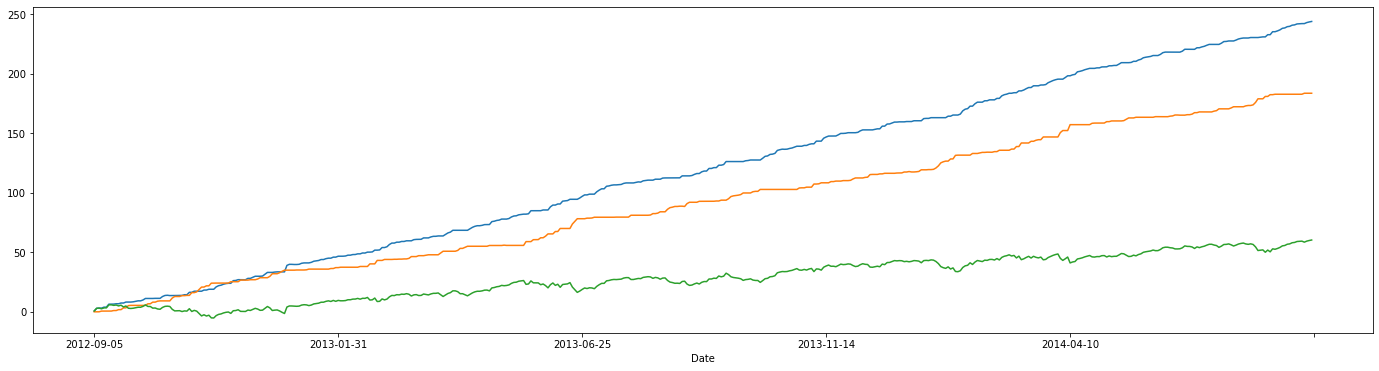

In [345]:
plt.figure(figsize=(24,6))
Train["long_mar"].cumsum().plot()
Train["short_mar"].cumsum().plot()
Train["spy"].cumsum().plot()